# Project 6: Counting and measuring freshwater snails

In this project thresholding and watershed algorithms are applied to count freshwater snails, and moreover, shape and pigmentation are quantified with `compute_shape_features` and `compute_texture_features`.

<div style="display: flex; flex-direction: row; text-align:left; gap: 10px;"  class="row">
    
<div class="col-md-6" style="flex: 1 1 0px;">
    
![Before](_figures/project_6_before.jpg)
    
**Input** - Snails photographed from a camera stand. Variable brightness across the tray and snail clumping are the biggest challenges.
    
</div>
<div class="col-md-6" style="flex: 1 1 0px;">

![After](_figures/project_6_after.jpg)
    
**Results** - After applying adaptive thresholding and a watershed algorithm, the snail separate well from the background. Now we can count them, and measure size, shape and colouration
    
</div>
</div>


## Background

Just like in the example before, segmentation and feature detection are a two-step process. First, a mask is set around tray, the reference is set manually (the detection algorithm only works on reference cards with clear boundaries, and not on "continuous" mm-paper), and then thresholding and watershed algorithm are applied. Remaining overlap is removed with the `edit_contour` tool, and `detect_contour` is used a once more to determine the final specimen contours. 

In the second step, the configuration file is modified to add `compute_shape_featues` and `compute_texture_features`, followed by a "silent run" `feedback=False`. 

For more information regarding this procedure also check in https://www.phenopype.org/gallery/example_5/.

## Preparation

In [1]:
import phenopype as pp
import os

## change working dir - will contain project folder
os.chdir(r"D:\git-repos\phenopype\phenopype-gallery\_temp")

## set project name
project_name = "project_6"

## fetch template from downloaded template repo 
template_path = r"D:\git-repos\phenopype\phenopype-templates\templates\gallery\gallery_project_6.yaml"

## set directory with images  
image_dir = r"D:\git-repos\phenopype\phenopype-gallery\gallery\data"

phenopype successfully imported the following plugin dependencies:
keras, tensorflow


## Project

In [2]:
proj = pp.Project(project_name)

--------------------------------------------
Creating a new phenopype project directory at:
D:\git-repos\phenopype\phenopype-gallery\_temp\project_6

Proceed? (y/n)
y

Project "project_6" successfully created.
--------------------------------------------


In [3]:
## add the two snail-images from the data folder
proj.add_files(image_dir = image_dir, include="snails")

--------------------------------------------
phenopype will search for image files at

D:\git-repos\phenopype\phenopype-gallery\gallery\data

using the following settings:

filetypes: ['jpg', 'JPG', 'jpeg', 'JPEG', 'tif', 'png', 'bmp'], include: snails, exclude: [], mode: copy, recursive: False, resize: False, unique: path

Found image snails1.jpg - phenopype-project folder 0__snails1 created
Found image snails2.jpg - phenopype-project folder 0__snails2 created

Found 2 files
--------------------------------------------


In [4]:
## add the config template; provide a tag
proj.add_config(template_path=template_path, tag="v1", overwrite=True)

- template saved under D:\git-repos\phenopype\phenopype-gallery\_temp\project_6\data\0__snails1\pype_config_v1.yaml
- template saved under D:\git-repos\phenopype\phenopype-gallery\_temp\project_6\data\0__snails2\pype_config_v1.yaml


In [5]:
## run image processing
for path in proj.dir_paths:
    pp.Pype(path, tag="v1")


AUTOLOAD
 - nothing to autoload
Stage: add annotation control args
Stage: add annotation control args
Stage: add annotation control args
Stage: add annotation control args
Stage: add annotation control args
Stage: add annotation control args
Updating pype config: applying staged changes


------------+++ new pype iteration 2022-07-06 16:57:01 +++--------------




PREPROCESSING
create_mask
create_reference
Reference set


SEGMENTATION
threshold
- multichannel image supplied, converting to grayscale
- decompose image: using gray channel
- including pixels from 1 drawn masks 
- excluding pixels from reference
detect_contour
- found 4270 contours that match criteria
watershed
- even kernel size supplied, adding 1 to make odd
- found 247 contours that match criteria
detect_contour
- found 126 contours that match criteria
edit_contour
detect_contour
- found 117 contours that match criteria


VISUALIZATION
select_canvas
- raw image
draw_contour
draw_mask


EXPORT
save_annotation
- creating 

## Edit config to extract shape features

In [6]:
target1 = """    - measurement:"""
replacement1 = """    - measurement:
        - compute_shape_features
        - compute_texture_features"""

proj.edit_config(tag="v1", target=target1, replacement=replacement1)

# phenopype gallery project 6
# ---------------------------
# count small freshwater snails and separate overlapping specimens

config_info:
    config_name: pype_config_v1.yaml
    date_created: '2022-07-06 16:56:58'
    date_last_modified:
    template_name: gallery_project_6.yaml
    template_path: D:\git-repos\phenopype\phenopype-templates\templates\gallery\gallery_project_6.yaml
processing_steps:
    - preprocessing:
        - create_mask:
            ANNOTATION: {type: mask, id: a, edit: false}
            tool: rectangle
        - create_reference:
            ANNOTATION: {type: reference, id: a, edit: false}
    - segmentation:
        - threshold:
            method: adaptive
            blocksize: 99
            constant: 3
        - detect_contour:
            ANNOTATION: {type: contour, id: a, edit: overwrite}
        - watershed:
            distance_cutoff: 0.7
        - detect_contour:
            ANNOTATION: {type: contour, id: b, edit: overwrite}
            min_area: 

In [7]:
## run image processing with deactivated feedback 
for path in proj.dir_paths:
    pp.Pype(path, tag="v1", feedback=False)
    


AUTOLOAD
- annotations loaded:
{
"mask": ["a"],
"reference": ["a"],
"drawing": ["a"]
}
Stage: add annotation control args
Stage: add annotation control args
Updating pype config: applying staged changes


------------+++ new pype iteration 2022-07-06 16:58:18 +++--------------


create_mask
- loaded existing annotation of type "mask" with ID "a": skipping (edit=False)
create_reference
- loaded existing annotation of type "reference" with ID "a": skipping (edit=False)
threshold
- multichannel image supplied, converting to grayscale
- decompose image: using gray channel
- including pixels from 1 drawn masks 
- excluding pixels from reference
detect_contour
- found 4270 contours that match criteria
watershed
- even kernel size supplied, adding 1 to make odd
- found 247 contours that match criteria
detect_contour
- found 126 contours that match criteria
edit_contour
- loaded existing annotation of type "drawing" with ID "a": skipping (edit=False)
detect_contour
- found 117 contours that m

Computing texture features: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 117/117 [00:03<00:00, 29.52it/s]


select_canvas
- raw image
draw_contour
draw_mask
save_annotation
- loading existing annotation file
- no annotation_type selected - exporting all annotations
- updating annotations of type "mask" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotations of type "reference" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotations of type "drawing" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotations of type "contour" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotations of type "contour" with id "b" in "annotations_v1.json" (overwrite="entry")
- updating annotations of type "contour" with id "c" in "annotations_v1.json" (overwrite="entry")
- writing annotations of type "shape_features" with id "a" to "annotations_v1.json"
- writing annotations of type "texture_features" with id "a" to "annotations_v1.json"
Updating pype config: applying staged changes


------------+++ finished pype iterati

Computing texture features: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:02<00:00, 25.91it/s]


select_canvas
- raw image
draw_contour
draw_mask
save_annotation
- loading existing annotation file
- no annotation_type selected - exporting all annotations
- updating annotations of type "mask" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotations of type "reference" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotations of type "drawing" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotations of type "contour" with id "a" in "annotations_v1.json" (overwrite="entry")
- updating annotations of type "contour" with id "b" in "annotations_v1.json" (overwrite="entry")
- updating annotations of type "contour" with id "c" in "annotations_v1.json" (overwrite="entry")
- writing annotations of type "shape_features" with id "a" to "annotations_v1.json"
- writing annotations of type "texture_features" with id "a" to "annotations_v1.json"
Updating pype config: applying staged changes


------------+++ finished pype iterati

In [8]:
## collect results and store in folder "<project-root>/results/annotations"
proj.collect_results("v1", "annotations", "annotations", overwrite=True)

Created D:\git-repos\phenopype\phenopype-gallery\_temp\project_6\results\annotations
Search string: ['annotations_v1']
Collected annotations_v1.json from 0__snails1
0__snails1_annotations_v1.json saved under D:\git-repos\phenopype\phenopype-gallery\_temp\project_6\results\annotations\0__snails1_annotations_v1.json.
Collected annotations_v1.json from 0__snails2
0__snails2_annotations_v1.json saved under D:\git-repos\phenopype\phenopype-gallery\_temp\project_6\results\annotations\0__snails2_annotations_v1.json.



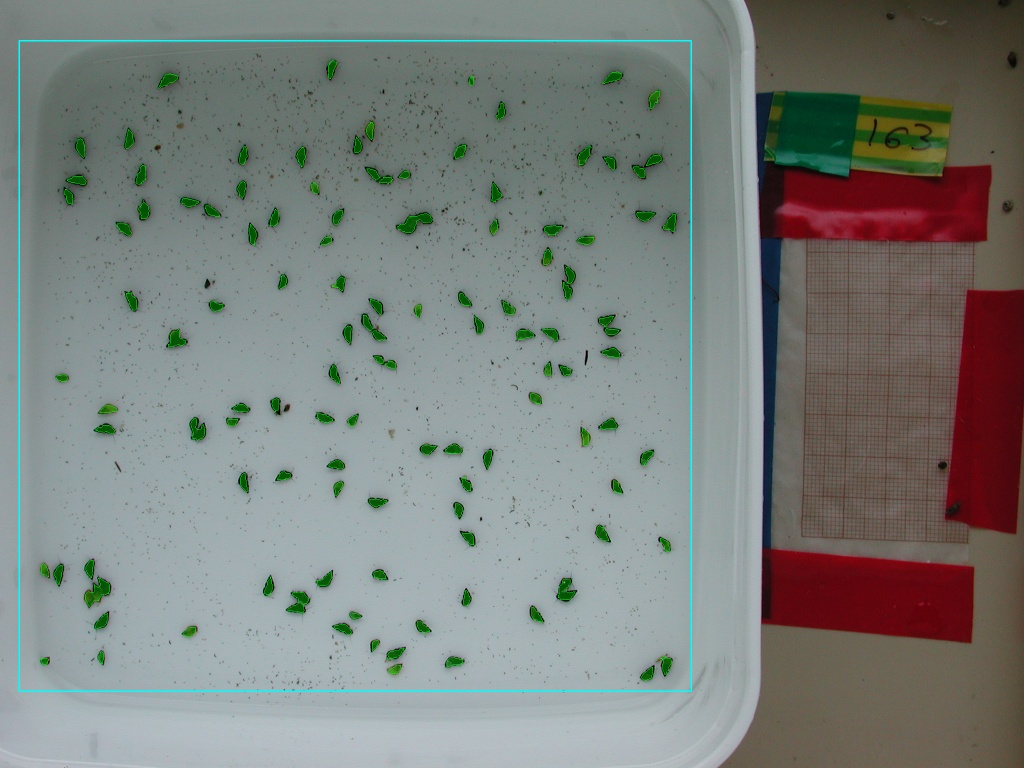
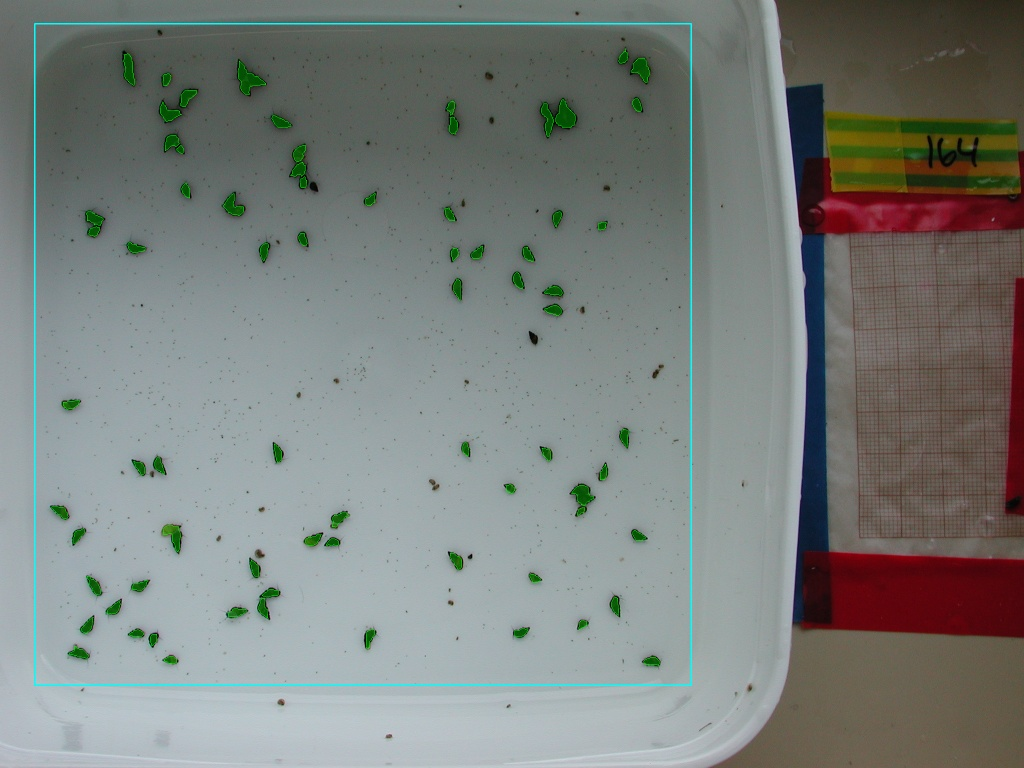


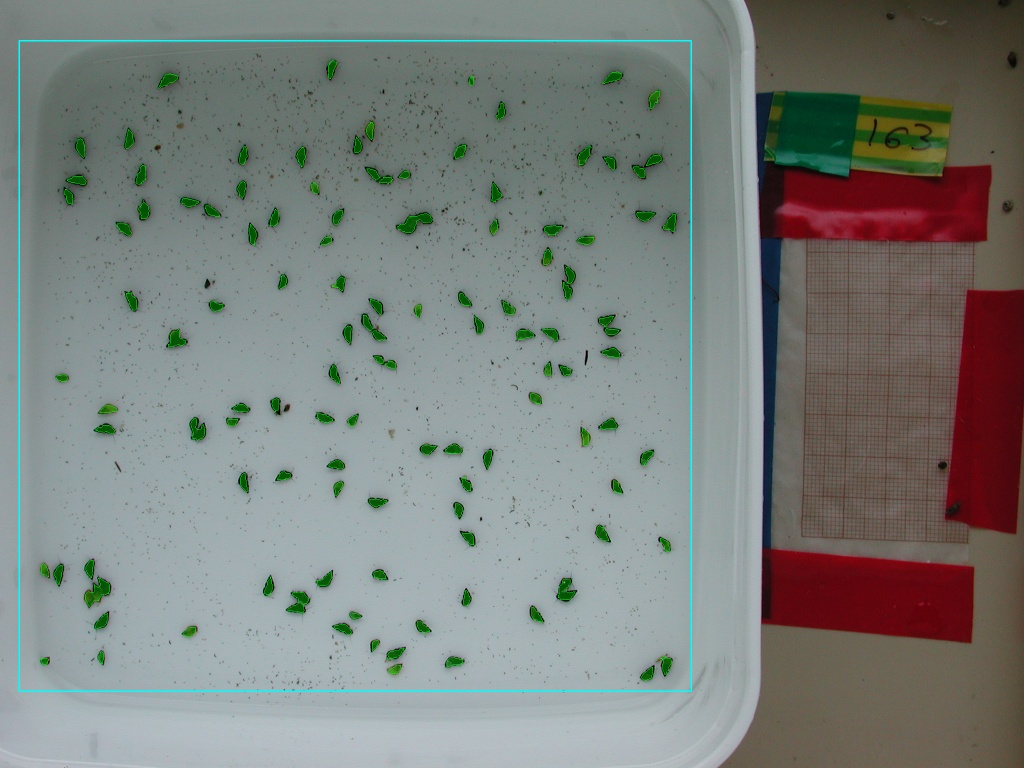
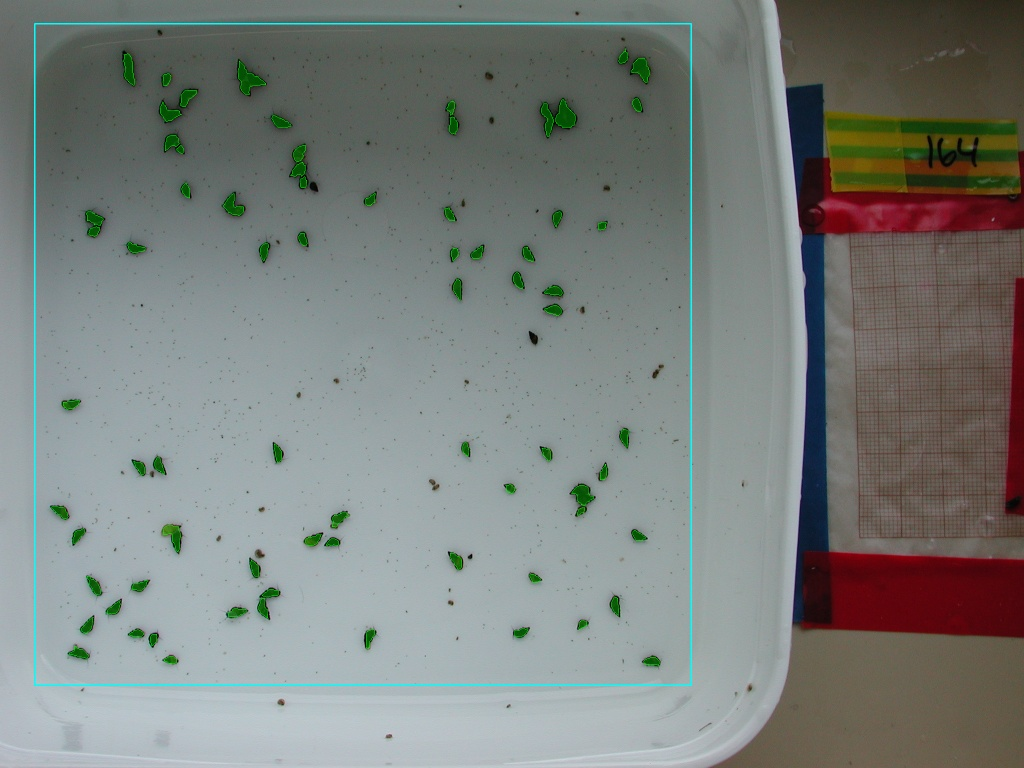

In [9]:
## display results
import ipyplot ## install with `pip install ipyplot`

canvas_list = []
for path in proj.dir_paths:
    canvas_list.append(pp.load_image(os.path.join(path, "canvas_v1.jpg"), mode="rgb"))

ipyplot.plot_images(canvas_list, img_width=300)